In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


In [52]:
pip install lime

  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=e40b596f4d0ab584b027704266e9ca00e288a89067a86c93f5756716ff14d429
  Stored in directory: c:\users\vidhathri b sharma\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("d/Crop_recommendation.csv")

In [3]:
df.shape

(2200, 8)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.isnull().values.any()

False

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
#df['label'].unique()

In [9]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of label')

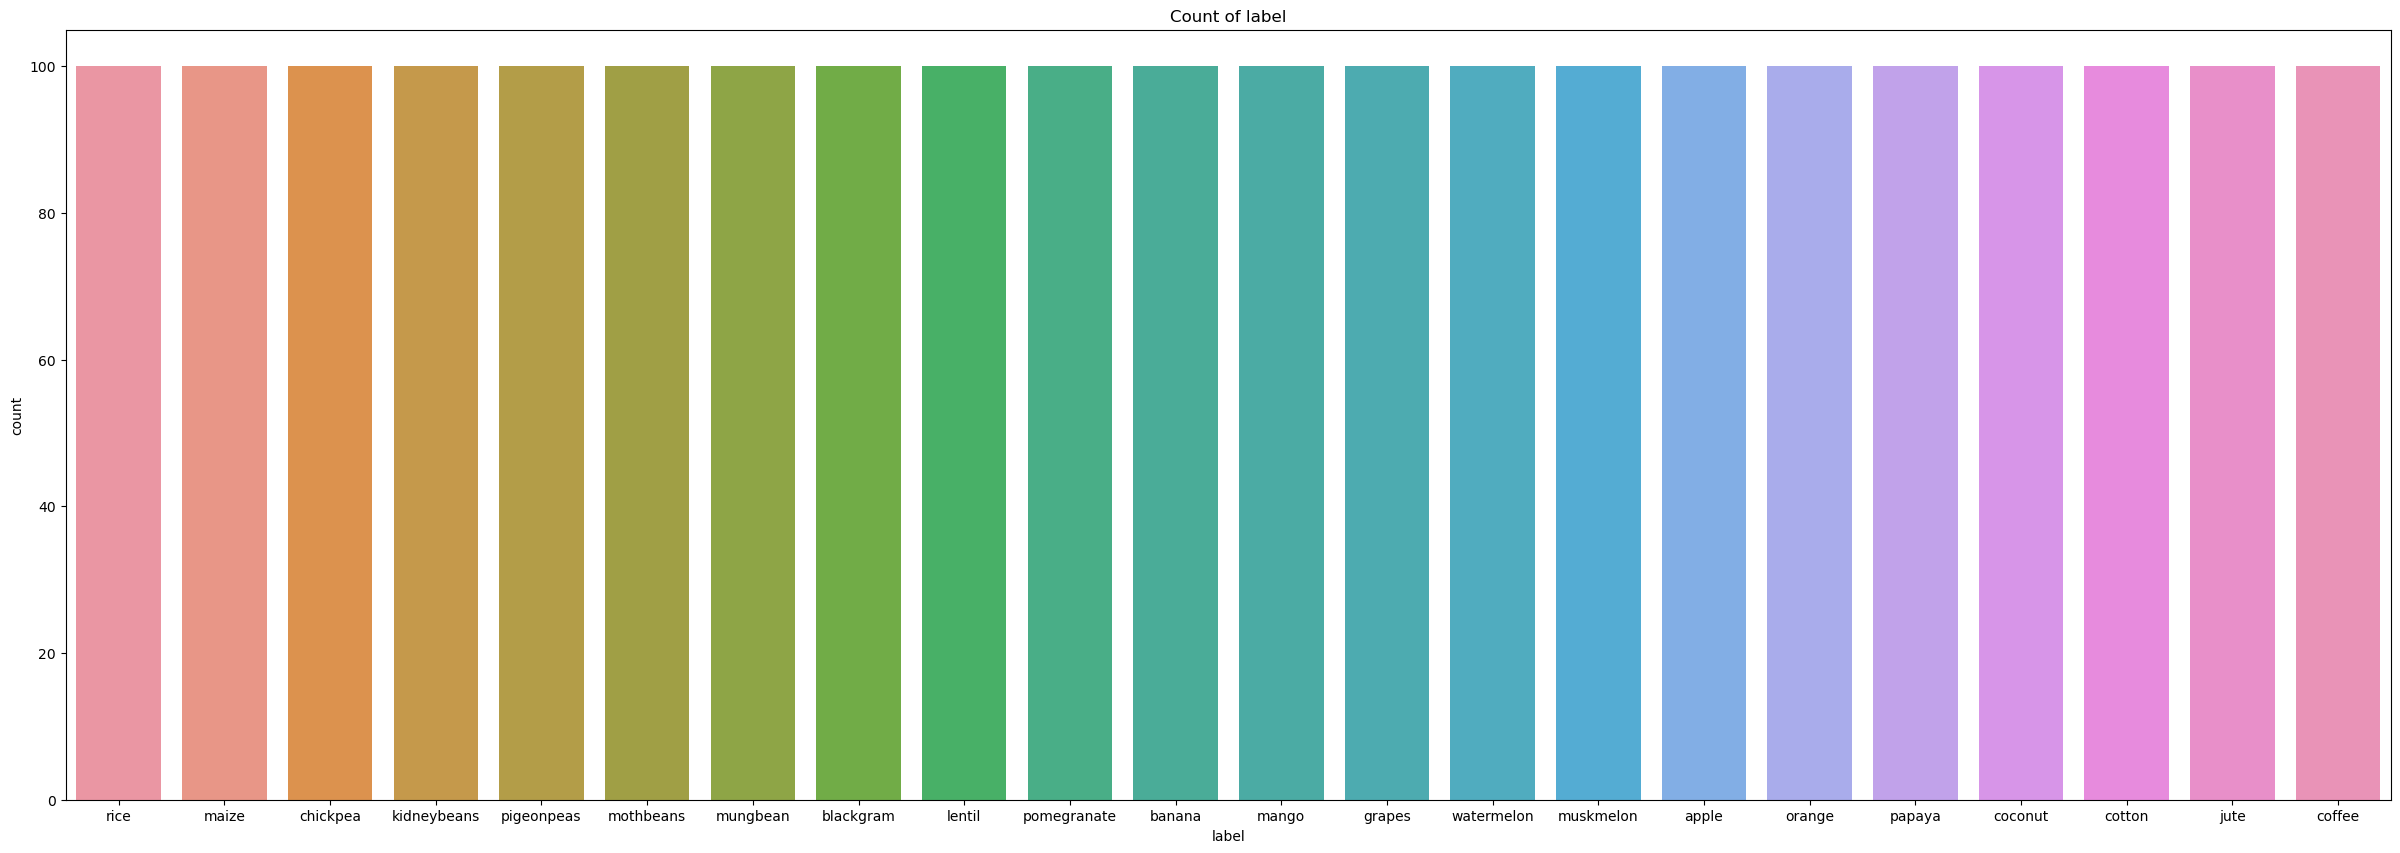

In [10]:
fig = plt.figure(figsize=(30, 10))
sns.countplot(x='label', data=df)
plt.title('Count of label')


In [12]:
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df['label']  = le.fit_transform(df['label'])


#display the initial records
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


<Axes: >

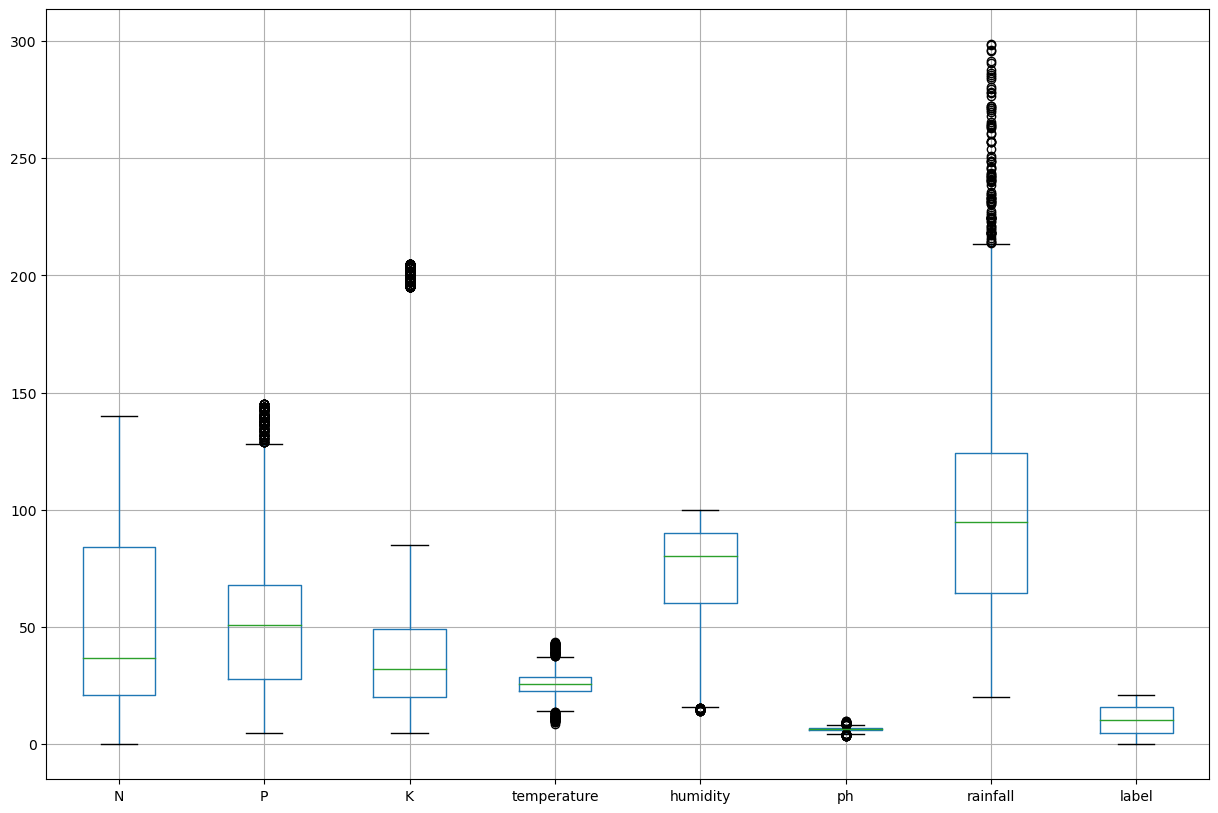

In [13]:
df.boxplot(figsize=(15,10))

In [14]:
import pandas as pd
from sklearn.covariance import EllipticEnvelope

# Assuming your DataFrame is named df and contains multiple columns
# Define the columns containing numerical data
numerical_columns = ['N','P', 'K', 'temperature', 'humidity', 'ph','rainfall']

# Create a copy of the DataFrame to preserve the original data
df_outliers_removed = df.copy()

# Loop through each numerical column and create a mask for outliers
for column in numerical_columns:
    data = df_outliers_removed[[column]]
    envelope = EllipticEnvelope(contamination=0.06)
    outlier_prediction = envelope.fit_predict(data)
    outliers_mask = outlier_prediction == -1
    df_outliers_removed = df_outliers_removed.loc[~outliers_mask]

# Reset the index if needed
df_outliers_removed.reset_index(drop=True, inplace=True)


<Axes: >

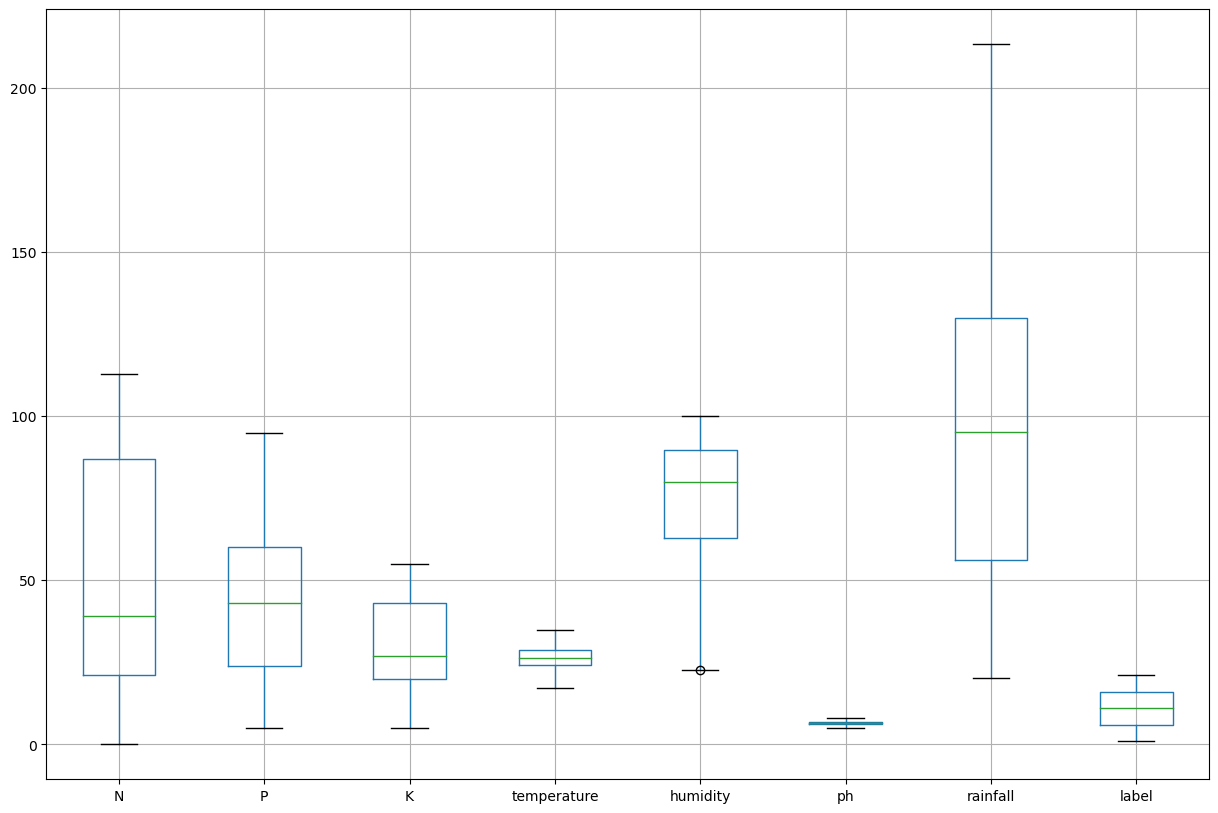

In [15]:
df_outliers_removed.boxplot(figsize=(15,10))

In [16]:
X = df_outliers_removed.drop('label', axis=1)
y = df_outliers_removed['label']

In [17]:
XScaled=X.apply(zscore)
XScaled.head()

,N,P,K,temperature,humidity,ph,rainfall
0,1.060480,-0.049808,0.949941,-1.469669,0.435089,-0.024680,2.059860
1,1.144420,0.570076,0.416702,-0.610197,0.438248,0.791240,1.710383
2,1.172399,0.304411,0.492879,-0.157636,0.356943,0.729654,2.191500
3,1.088460,-0.359750,0.645233,-0.670796,0.342604,0.768367,2.125679
4,1.032501,0.083024,0.416702,-1.347598,0.345906,-0.127244,1.714740


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=1)
print('X training data size:{}'.format(X_train.shape))
print('y training data size:{}'.format(y_train.shape))
print('X testing data size:{}'.format(X_test.shape))
print('y testing data size:{}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(df.index))*100))

X training data size:(997, 7)
y training data size:(997,)
X testing data size:(428, 7)
y testing data size:(428,)
45.32% of data is in training set
19.45% of data is in test set


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
import timeit
from keras.layers import Dropout

In [20]:
model = Sequential()
#Input Layer
model.add(Dense(128, activation='relu', input_shape=(7,)))

model.add(Dense(128, activation='relu'))



#Output layer
model.add(Dense(22, activation='softmax'))

C:\Users\dharithrisharma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [22]:
hist = model.fit(X_train, y_train,batch_size=64, epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.1067 - loss: 18.6852 - val_accuracy: 0.2734 - val_loss: 3.5086
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3808 - loss: 2.9611 - val_accuracy: 0.5864 - val_loss: 1.3265
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6578 - loss: 1.0872 - val_accuracy: 0.8037 - val_loss: 0.5894
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8373 - loss: 0.4987 - val_accuracy: 0.8621 - val_loss: 0.3859
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.3644 - val_accuracy: 0.8785 - val_loss: 0.3550
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9167 - loss: 0.3102 - val_accuracy: 0.8879 - val_loss: 0.3118
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9176 - loss: 0.2605 - val_accuracy: 0.8785 - val_loss: 0.3148
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 0.2457 - val_accuracy: 0.9159 - val_los

In [23]:
# calculating Accuracy
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9339 - loss: 0.1836 
Accuracy: 92.29


In [24]:
print("Generate predictions for all samples")
yhat_probs = model.predict(X_test)  # Get the predicted probabilities for each class
yhat_classes = yhat_probs.argmax(axis=1)  # Get the index of the class with the highest probability for each sample

print("Predicted class labels:")
print(yhat_classes)

Generate predictions for all samples
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted class labels:
[10 14 19  2 15 21 11  1 10  5 19 14 21 11  8 14  2 10  5  1  1 10 14  2
  5 10  2 19 17 14 11 11  4 19  8  4 11 11  2  2  8 12  4 12 10 10 16 21
 21  6  8 21  1 11 21  5 16  2  8 15  8  4 11  4 14 18 14  2  8 13  8 10
  5  1 19 18  2 11 10  4  1  5 11  5 17 16 17 18 17 18  8 15 14 19  1  4
 19 12 15 15 17 10 10 21  2 15 15 10  4 16  1 13  2 11  2  8  8 11 15 17
 16 12 12 15 19 12 19  8 19  4  8 10 12 14  1 14 21  1  6 10 10 11  8  1
 13 16  2 12 21 11  4 10 15 18 21 12 21  4 15  6  2 18 12  2  8  9 14 10
 11 19 11 14  6 21 16 11  4 10 11  8  4 19 11 12  4 12 16 13 17  5  5  2
 19  2 18  2  2 12 19  8 11  2  9  4 11  9  8  1 14 14 14  4 15 18 17  9
  4 18 13 21  5 11  1 16  9  4  2  4  8 11  1 19  6 12 18 10  1 11 17  4
 14 11  5 14 19 16  4  4  5 17 16  8  8 12  2 21 11 15 10 19 16 12  9 11
 10 11 17 12 21  4  5  9 12  1 15  9  9  1  2  5  8 21 19  5  5 18 10  8
  8 21  2 14 19 15  2  

In [25]:
import numpy as np

print("Comparing actual label and predicted label")
yhat_probs = model.predict(X_test)  # Get the predicted probabilities for each class
yhat_classes = yhat_probs.argmax(axis=1)  # Get the index of the class with the highest probability for each sample

# Convert yhat_classes back to a 2D column array to stack with y_test
yhat_classes = yhat_classes.reshape(-1, 1)

# Stack y_test and yhat_classes side by side using np.column_stack
comparison = np.column_stack((y_test, yhat_classes))

print("Actual and Predicted Labels:")
print(comparison)

Comparing actual label and predicted label
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
Actual and Predicted Labels:
[[10 10]
 [14 14]
 [19 19]
 [13  2]
 [15 15]
 [21 21]
 [11 11]
 [ 1  1]
 [10 10]
 [ 5  5]
 [19 19]
 [14 14]
 [21 21]
 [11 11]
 [ 8  8]
 [14 14]
 [ 2  2]
 [10 10]
 [ 5  5]
 [ 1  1]
 [ 1  1]
 [10 10]
 [14 14]
 [ 2  2]
 [ 5  5]
 [10 10]
 [ 2  2]
 [19 19]
 [17 17]
 [14 14]
 [11 11]
 [ 6 11]
 [ 4  4]
 [19 19]
 [ 8  8]
 [ 4  4]
 [11 11]
 [11 11]
 [ 2  2]
 [10  2]
 [ 8  8]
 [12 12]
 [ 4  4]
 [12 12]
 [10 10]
 [10 10]
 [16 16]
 [21 21]
 [21 21]
 [ 6  6]
 [20  8]
 [21 21]
 [ 1  1]
 [11 11]
 [21 21]
 [ 5  5]
 [16 16]
 [ 2  2]
 [20  8]
 [15 15]
 [ 8  8]
 [ 4  4]
 [11 11]
 [ 4  4]
 [14 14]
 [18 18]
 [14 14]
 [ 2  2]
 [ 8  8]
 [13 13]
 [ 8  8]
 [13 10]
 [ 5  5]
 [ 1  1]
 [19 19]
 [18 18]
 [ 2  2]
 [11 11]
 [10 10]
 [ 4  4]
 [ 1  1]
 [ 5  5]
 [11 11]
 [ 5  5]
 [17 17]
 [16 16]
 [17 17]
 [18 18]
 [17 17]
 [18 18]
 [ 8  8]
 [15 15]
 [14 14]
 [19 19]
 [ 1  1]
 [ 4  4]
 [19 19]
 [12 12]
 [15 

In [26]:
from sklearn.metrics import accuracy_score

# Assuming yhat contains the predicted class labels for X_test
yhat_probs = model.predict(X_test)  # Get the predicted probabilities for each class
yhat = yhat_probs.argmax(axis=1)  # Get the index of the class with the highest probability for each sample

# Calculate accuracy score
test_score = accuracy_score(y_test, yhat)

print("Accuracy score on test data:", test_score)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
Accuracy score on test data: 0.9228971962616822


In [31]:
#print Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yhat, y_test)

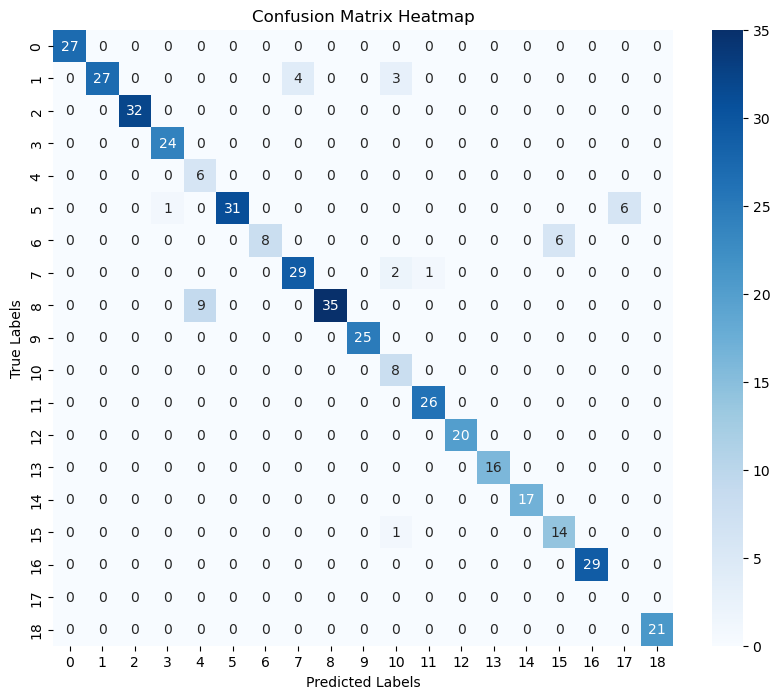

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

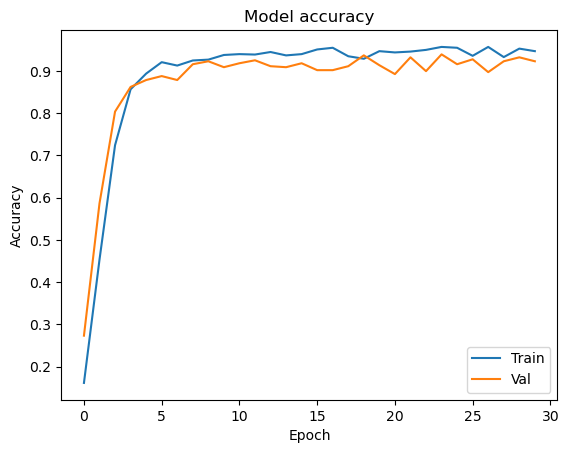

In [33]:
#plotiing Train vs Validation Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

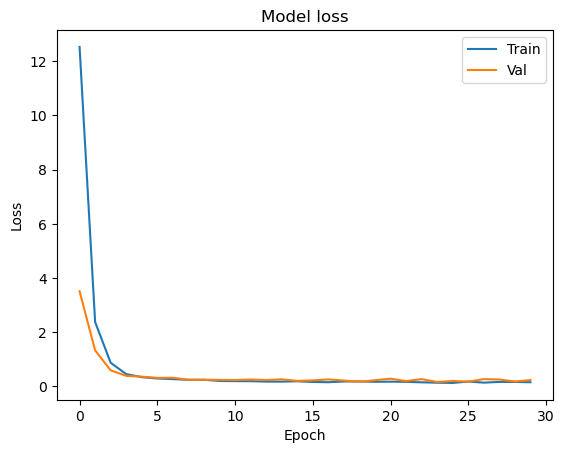

In [34]:
#plotiing Train vs Validation Loss
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [35]:
# Create the SVM classifier with OvR strategy
svm_classifier = SVC(kernel='linear', C=1.0, decision_function_shape='ovr')


In [36]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
y_pred = svm_classifier.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.985981308411215


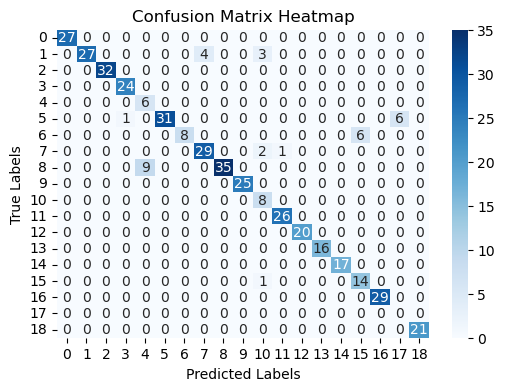

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yhat, y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [40]:
svm_classifier = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr')


In [41]:
svm_classifier.fit(X_train, y_train)

SVC()

In [42]:
y_pred = svm_classifier.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9742990654205608


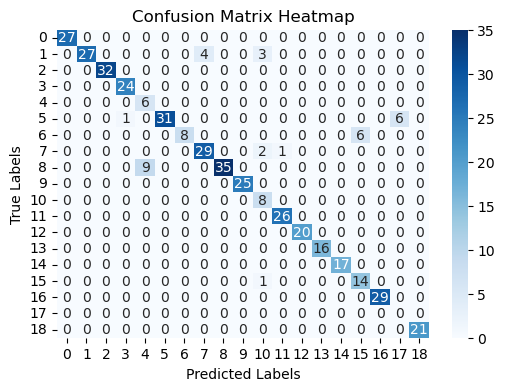

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yhat, y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [45]:
svm_classifier = SVC(kernel='poly', C=1.0, decision_function_shape='ovr')


In [46]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [47]:
y_pred = svm_classifier.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9813084112149533


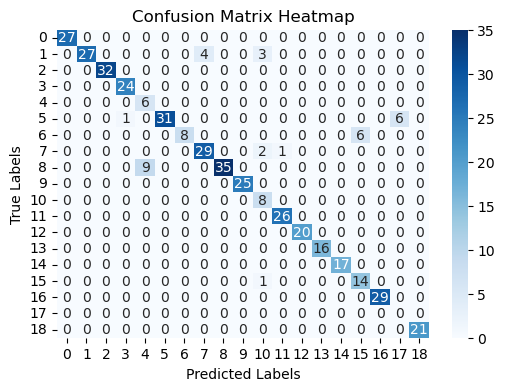

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yhat, y_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g',cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [53]:
import numpy as np
import lime
import lime.lime_tabular
from sklearn.neural_network import MLPClassifier

In [54]:
ann_classifier = MLPClassifier(hidden_layer_sizes=(128,128), activation='relu', solver='adam', random_state=42)
ann_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128), random_state=42)

In [55]:
X_instance = X_train.iloc[0].values

In [56]:
feature_names=['N','P','K','temperature','humidity','ph','rainfall']

In [57]:
class_names=[20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5]

In [58]:
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), 
                                                  mode='classification', 
                                                  feature_names=feature_names,
                                                  class_names=class_names)

In [59]:
exp = explainer.explain_instance(X_instance, ann_classifier.predict_proba, num_features=7)


C:\Users\dharithrisharma\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [60]:
print('Explanation for the instance:')
exp.show_in_notebook(show_table=True, show_all=False)

Explanation for the instance:
